<a href="https://colab.research.google.com/github/nguyenbac5299/ComputerVision/blob/main/Neural_Networks_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [ ]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
tf.__version__

'2.8.0'

#Approach 1- extract all the pixels

##extracting pixels from images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/data/Datasets/homer_bart_1.zip'
zip_object= zipfile.ZipFile(file= path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dir='/content/homer_bart_1'
files=[os.path.join(dir, f) for f in sorted(os.listdir(dir))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [ ]:
height, width= 128,128
images=[]
classes=[]

In [ ]:
for image_path in files:
  try:
    image= cv2.imread(image_path)
    (H,W)= image.shape[:2]
  except:
    continue

  image= cv2.resize(image, (width, height))
  image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image= image.ravel() # convert to vector
  images.append(image)

  image_name= os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('b'):
    class_name=0
  else:
    class_name=1
  classes.append(class_name)

  

In [ ]:
X= np.asarray(images)
Y= np.asarray(classes)

In [ ]:
print (type(X))
X.shape

<class 'numpy.ndarray'>


(269, 16384)

In [ ]:
print (type(Y))
Y.shape

<class 'numpy.ndarray'>


(269,)

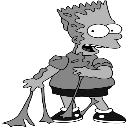

In [ ]:
cv2_imshow(X[0].reshape(width, height))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


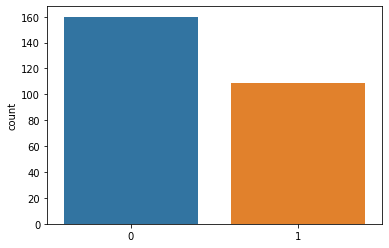

In [ ]:
seaborn.countplot(Y)

In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([160, 109]))

##normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
X= scaler.fit_transform(X)


In [ ]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

##train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((215, 16384), (54, 16384), (215,), (54,))

##building and training the newral network

In [ ]:
(16384+2)/2

8193.0

In [ ]:
# 16384 -> 8193 -> 8193 ->1

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
network1= tf.keras.models.Sequential()
network1.add(Dense(input_shape=(16384,), activation='relu', units=8193))
network1.add(Dense(units=8193, activation='relu'))
network1.add(Dense(units=1, activation='sigmoid'))

In [ ]:
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_4 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_5 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= network1.fit(X_train, Y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 8s 901ms/step - loss: 164.3822 - accuracy: 0.4884
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 6.0375 - accuracy: 0.5395
Epoch 3/50
7/7 [==============================] - 6s 894ms/step - loss: 2.0352 - accuracy: 0.6140
Epoch 4/50
7/7 [==============================] - 6s 892ms/step - loss: 1.6435 - accuracy: 0.5442
Epoch 5/50
7/7 [==============================] - 6s 871ms/step - loss: 1.2817 - accuracy: 0.5721
Epoch 6/50
7/7 [==============================] - 6s 863ms/step - loss: 3.2768 - accuracy: 0.5395
Epoch 7/50
7/7 [==============================] - 6s 861ms/step - loss: 2.0535 - accuracy: 0.5953
Epoch 8/50
7/7 [==============================] - 6s 881ms/step - loss: 1.0254 - accuracy: 0.4419
Epoch 9/50
7/7 [==============================] - 6s 870ms/step - loss: 0.7271 - accuracy: 0.6047
Epoch 10/50
7/7 [==============================] - 6s 908ms/step - loss: 0.6289 - accuracy: 0.6465
Epoch 11/50
7/7 [===

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

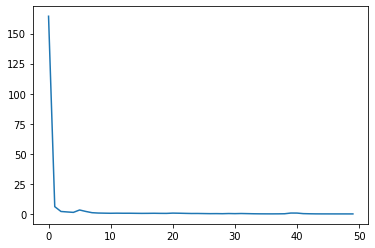

In [ ]:
plt.plot(history.history['loss'])

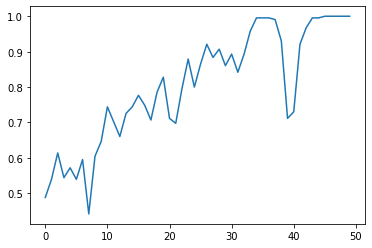

In [ ]:
plt.plot(history.history['accuracy'])

## evaluating the neural network

In [ ]:
predictions= network1.predict(X_test)

In [ ]:
predictions

array([[0.00246689],
       [0.99990785],
       [0.01889601],
       [0.03798106],
       [0.78423333],
       [0.00968587],
       [0.9997677 ],
       [0.93503773],
       [0.83695215],
       [0.9853866 ],
       [0.08453381],
       [1.        ],
       [0.9756106 ],
       [0.9415746 ],
       [0.22671112],
       [0.0135372 ],
       [0.12059751],
       [0.9284973 ],
       [0.00826105],
       [0.00237465],
       [0.00229782],
       [0.98027253],
       [0.00611341],
       [0.18240786],
       [0.05268142],
       [0.94849145],
       [0.00405896],
       [0.00998175],
       [0.2307696 ],
       [0.9970361 ],
       [0.7555217 ],
       [0.99996346],
       [0.9767162 ],
       [0.00101465],
       [0.999998  ],
       [0.00760698],
       [0.66835284],
       [0.01026863],
       [0.13835046],
       [0.00204748],
       [0.9920776 ],
       [0.98839974],
       [0.18127063],
       [0.01491886],
       [0.00308979],
       [0.26141012],
       [0.99470454],
       [0.015

In [ ]:
Y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
predictions= (predictions>0.5)
accuracy_score(predictions, Y_test)

0.7222222222222222

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, predictions)
cm

array([[21,  7],
       [ 8, 18]])

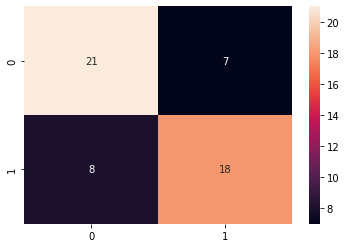

In [ ]:
seaborn.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.72      0.69      0.71        26

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



##saving anh loading the model





In [ ]:
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network1_saved= save_model(network1,'weghts1.hdf5')

In [ ]:
with open('network1.json') as json_file:
  json_saved_model= json_file.read()

network1_loaded= tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('weghts1.hdf5')
network1_loaded.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accurency'])
network1_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_4 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_5 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


##classifying single image

In [ ]:
test_image= X_test[0]
print(test_image.shape)
test_image= scaler.inverse_transform(test_image.reshape(1,-1))
print(test_image.shape)

(16384,)
(1, 16384)


In [ ]:
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

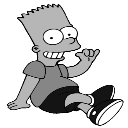

In [ ]:
cv2_imshow(test_image.reshape(width,height))

In [ ]:
network1_loaded.predict(test_image)

array([[0.]], dtype=float32)

In [ ]:
 network1_loaded.predict(X[0].reshape(1,-1))

array([[0.00021231]], dtype=float32)

# Approach 2 - feature extraction

## feature extractor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/Colab Notebooks/data/Datasets/homer_bart_1.zip'
zip_object= zipfile.ZipFile(file= path, mode='r')
zip_object.extractall('./')
zip_object.close()

dir='/content/homer_bart_1'
files=[os.path.join(dir, f) for f in sorted(os.listdir(dir))]
print(files)

Mounted at /content/drive
['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_ba

In [ ]:
export='mouth, pants, shoes, tshirt, shorts, sneakers, class/n'
show_images= True
features=[]

In [ ]:
for image_path in files:
  try:
    original_image= cv2.imread(image_path)
    (H,W)= original_image.shape[:2]
  except:
    continue
  image= original_image.copy()
  image_features =[]
  mouth= pants= shoes=0
  tshirt=short=sneakers=0

  image_name= os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('b'):
    class_name= 0
  else:
    class_name=1

##train and test sets

## Building and traning 

## Evaluating

## Saving, loading and classifying one single image